## To understand the columns and their relationship with SII

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from scipy.stats import pearsonr, spearmanr

In [2]:
# setting up the grid for all the plots

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
train = pd.read_csv(r'C:\Users\samhi\OneDrive - sjsu.edu\Documents\sjsu\Fall_24\ML\GWAR\Dataset\train.csv')
test = pd.read_csv(r'C:\Users\samhi\OneDrive - sjsu.edu\Documents\sjsu\Fall_24\ML\GWAR\Dataset\test.csv')
data_dict = pd.read_csv(r'C:\Users\samhi\OneDrive - sjsu.edu\Documents\sjsu\Fall_24\ML\GWAR\Dataset\data_dictionary.csv')

In [4]:
#checking columns in train and test 
print(train.columns)
print(test.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [45]:
display(train.head())
print(f"Train shape: {train.shape}")

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train shape: (3960, 82)


In [46]:
display(test.head())
print(f"Test shape: {test.shape}")

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Test shape: (20, 59)


In [47]:
data_dict.head()

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [48]:
train.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 82, dtype: int64

In [25]:
#Physical Measures columns from the dataset

physical_measures = train[['Physical-Season', 'Physical-BMI', 'Physical-Height',
                           'Physical-Weight', 'Physical-Waist_Circumference',
                           'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP']]


# Summary Statistics
print("Physical Measures - Summary Stats")
print(physical_measures.describe())

# Check for Missing Values
print("\nPhysical Measures - Missing Values")
print(physical_measures.isnull().sum())

categories = train['Basic_Demos-Sex'].nunique()
print("Gender Values", categories)


Physical Measures - Summary Stats
       Physical-BMI  Physical-Height  Physical-Weight  \
count   3022.000000      3027.000000      3076.000000   
mean      19.331929        55.946713        89.038615   
std        5.113934         7.473764        44.569040   
min        0.000000        33.000000         0.000000   
25%       15.869350        50.000000        57.200000   
50%       17.937682        55.000000        77.000000   
75%       21.571244        62.000000       113.800000   
max       59.132048        78.500000       315.000000   

       Physical-Waist_Circumference  Physical-Diastolic_BP  \
count                    898.000000            2954.000000   
mean                      27.278508              69.648951   
std                        5.567287              13.611226   
min                       18.000000               0.000000   
25%                       23.000000              61.000000   
50%                       26.000000              68.000000   
75%               

In [12]:
# FitnessGram-related fields
Fitnessgram_fields = train[['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 
                            'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
                            'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
                            'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD',
                            'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
                            'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
                            'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone']]

# Separating numeric and categorical fields
fitnessgram_numeric = Fitnessgram_fields.select_dtypes(include=['float64', 'int64'])
fitnessgram_categorical = Fitnessgram_fields.select_dtypes(include=['object'])

# Displaying summary statistics for numeric fields
print("FitnessGram - Numeric Fields Summary:")
print(fitnessgram_numeric.describe())

# Displaying value counts for categorical fields
print("\nFitnessGram - Categorical Fields Value Counts:")
for col in fitnessgram_categorical.columns:
    print(f"\n{col}:")
    print(fitnessgram_categorical[col].value_counts())


# Checking for missing values
print("FitnessGram - Missing Values in All Fields:")
print(Fitnessgram_fields.isnull().sum())

# Displaying summary statistics for numeric fields
print("\nFitnessGram - Numeric Fields Summary:")
print(fitnessgram_numeric.describe())

FitnessGram - Numeric Fields Summary:
       Fitness_Endurance-Max_Stage  Fitness_Endurance-Time_Mins  \
count                   743.000000                   740.000000   
mean                      4.989233                     7.370270   
std                       2.014072                     3.189662   
min                       0.000000                     0.000000   
25%                       4.000000                     6.000000   
50%                       5.000000                     7.000000   
75%                       6.000000                     9.000000   
max                      28.000000                    20.000000   

       Fitness_Endurance-Time_Sec   FGC-FGC_CU  FGC-FGC_CU_Zone  FGC-FGC_GSND  \
count                  740.000000  2322.000000      2282.000000   1074.000000   
mean                    27.581081    11.259690         0.476337     22.420438   
std                     17.707751    11.807781         0.499549     10.833995   
min                      0.000000 

In [13]:
# Select available Bio-electric Impedance fields
bia_fields = train[['BIA-BIA_FFM', 'BIA-BIA_TBW', 'BIA-BIA_ECW', 'BIA-BIA_ICW', 
                    'BIA-BIA_Fat', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_BMI', 
                    'BIA-BIA_DEE', 'BIA-BIA_Frame_num', 'BIA-BIA_LDM', 'BIA-BIA_LST', 
                    'BIA-BIA_SMM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI']]

# Summary Statistics
print("Bio-electric Impedance - Summary Statistics")
print(bia_fields.describe())

# Check for Missing Values
print("\nBio-electric Impedance - Missing Values")
print(bia_fields.isnull().sum())


Bio-electric Impedance - Summary Statistics
       BIA-BIA_FFM  BIA-BIA_TBW  BIA-BIA_ECW  BIA-BIA_ICW  BIA-BIA_Fat  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean     74.021708    53.998726    20.825346    33.173380    16.855020   
std     199.433753   129.362539    73.266287    56.272346   199.372119   
min      28.900400    20.589200     1.789450    14.489000 -8745.080000   
25%      49.278100    35.887000    11.109550    24.463500     8.602395   
50%      61.066200    44.987000    15.928000    28.855800    16.174600   
75%      81.833800    60.271050    25.162200    35.475700    30.273100   
max    8799.080000  5690.910000  3233.000000  2457.910000   153.820000   

       BIA-BIA_BMC   BIA-BIA_BMR  BIA-BIA_BMI    BIA-BIA_DEE  \
count  1991.000000   1991.000000  1991.000000    1991.000000   
mean      6.719826   1237.018187    19.367048    2064.693747   
std      92.586325   1872.383246     5.047848    2836.246272   
min      -7.789610    813.397000 

In [19]:
# Select available Demographics fields
demographics = train[['Basic_Demos-Enroll_Season','Basic_Demos-Age', 'Basic_Demos-Sex']]

# Summary Statistics for Numeric Fields
print("Demographics - Summary Statistics")
print(demographics.describe())

# Value Counts for Categorical Fields
print("\nDemographics - Categorical Fields Value Counts")
print(demographics['Basic_Demos-Enroll_Season'].value_counts())

# Check for Missing Values
print("\n Missing Values")
print(demographics.isnull().sum())

Demographics - Summary Statistics
       Basic_Demos-Age  Basic_Demos-Sex
count      3960.000000      3960.000000
mean         10.433586         0.372727
std           3.574648         0.483591
min           5.000000         0.000000
25%           8.000000         0.000000
50%          10.000000         0.000000
75%          13.000000         1.000000
max          22.000000         1.000000

Demographics - Categorical Fields Value Counts
Spring    1127
Winter     997
Summer     970
Fall       866
Name: Basic_Demos-Enroll_Season, dtype: int64

 Missing Values
Basic_Demos-Enroll_Season    0
Basic_Demos-Age              0
Basic_Demos-Sex              0
dtype: int64


In [20]:
# Select CGAS data fields
cgas_fields = train[['CGAS-Season', 'CGAS-CGAS_Score']]

# Summary Statistics
print("CGAS - Summary Statistics")
print(cgas_fields.describe())

# Check for Missing Values
print("\nCGAS - Missing Values")
print(cgas_fields.isnull().sum())


CGAS - Summary Statistics
       CGAS-CGAS_Score
count      2421.000000
mean         65.454771
std          22.341862
min          25.000000
25%          59.000000
50%          65.000000
75%          75.000000
max         999.000000

CGAS - Missing Values
CGAS-Season        1405
CGAS-CGAS_Score    1539
dtype: int64


In [22]:
# Check the number of missing values in the 'sii' column
missing_sii = train['sii'].isnull().sum()
print(f"Number of missing values in 'sii': {missing_sii}")
print(len(train))

Number of missing values in 'sii': 1224
3960


In [28]:
missing_PCIAT = train['PCIAT-PCIAT_Total'].isnull().sum() 
print(f"Number of missing values in PCIAT total: {missing_sii}")

Number of missing values in PCIAT total: 1224


count    2421.000000
mean       65.454771
std        22.341862
min        25.000000
25%        59.000000
50%        65.000000
75%        75.000000
max       999.000000
Name: CGAS-CGAS_Score, dtype: float64


<AxesSubplot:title={'center':'Distribution of CGAS-CGAS_Score'}, ylabel='Frequency'>

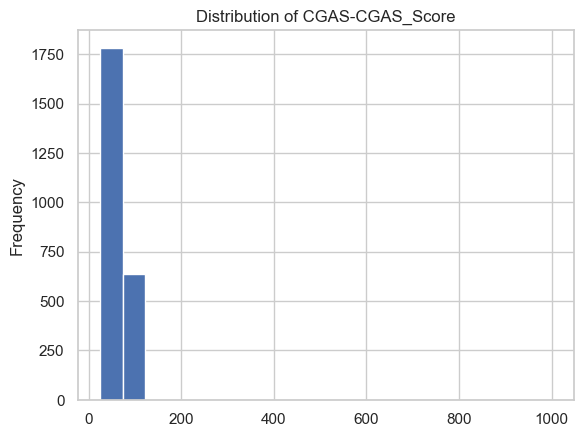

In [23]:
# Descriptive stats and plot for CGAS-CGAS_Score
print(train['CGAS-CGAS_Score'].describe())
train['CGAS-CGAS_Score'].plot(kind='hist', bins=20, title='Distribution of CGAS-CGAS_Score')


In [24]:
# Calculate correlation between CGAS-CGAS_Score and sii
correlation = train[['CGAS-CGAS_Score', 'sii']].corr().iloc[0, 1]
print(f"Correlation between CGAS-CGAS_Score and sii: {correlation}")


Correlation between CGAS-CGAS_Score and sii: -0.08526076127412004


<AxesSubplot:xlabel='CGAS-CGAS_Score', ylabel='sii'>

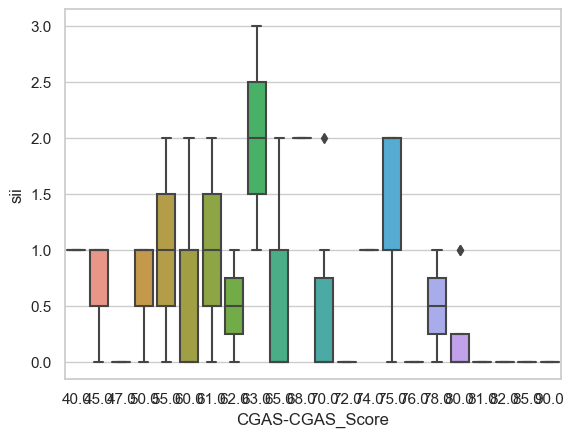

In [27]:
import seaborn as sns

# Assuming 'train' is a pandas DataFrame
small_data = train.sample(n=100)  # Adjust 'n' to the number of rows you want to sample

sns.boxplot(data=small_data, x='CGAS-CGAS_Score', y='sii')



# EDA on Dropped rows data

In [25]:
print(data.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [6]:
columns_to_check = [
    'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
    'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12',
    'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
    'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20'
]  # Add all the other PCIAT columns

# Drop rows where any of these columns have NaN values
data = train.dropna(subset=columns_to_check)

# Now 'train_cleaned' will have rows with no empty values in the specified columns

# Print the number of rows in the cleaned DataFrame
print(f"Number of rows after dropping NaN values: {data.shape[0]}")

Number of rows after dropping NaN values: 2671


In [67]:
data.head(5)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0


**To check for empty values in Age and Sex Colum**

In [68]:
def calculate_stats(data, columns):
    if isinstance(columns, str):
        columns = [columns]

    stats = []
    for col in columns:
        if data[col].dtype in ['object', 'category']:
            counts = data[col].value_counts(dropna=False, sort=False)
            percents = data[col].value_counts(normalize=True, dropna=False, sort=False) * 100
            formatted = counts.astype(str) + ' (' + percents.round(2).astype(str) + '%)'
            stats_col = pd.DataFrame({'count (%)': formatted})
            stats.append(stats_col)
        else:
            stats_col = data[col].describe().to_frame().transpose()
            stats_col['missing'] = data[col].isnull().sum()
            stats_col.index.name = col
            stats.append(stats_col)

    return pd.concat(stats, axis=0)

In [69]:
assert data['Basic_Demos-Age'].isna().sum() == 0
assert data['Basic_Demos-Sex'].isna().sum() == 0

Count as per Age groups

In [70]:
data = data.copy()

In [71]:
data.head(5)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0


In [82]:
import pandas as pd

# Categorize ages into groups
data['Age Group'] = pd.cut(
    data['Basic_Demos-Age'],
    bins=[4, 12, 18, 22],
    labels=['Children (5-12)', 'Adolescents (13-18)', 'Adults (19-22)']
)

# Call the function
calculate_stats(data, 'Age Group')


,count (%)
Children (5-12),2030 (76.0%)
Adolescents (13-18),606 (22.69%)
Adults (19-22),35 (1.31%)


In [73]:
sex_map = {0: 'Male', 1: 'Female'}
data['Basic_Demos-Sex'] = data['Basic_Demos-Sex'].map(sex_map)
calculate_stats(data, 'Basic_Demos-Sex')

,count (%)
Male,1696 (63.5%)
Female,975 (36.5%)


In [75]:
empty_count = data['sii'].isnull().sum()
print(empty_count)

empty_gender = data['Basic_Demos-Sex'].isnull().sum()
print(empty_gender)


0
0


SII Across multiple age groups

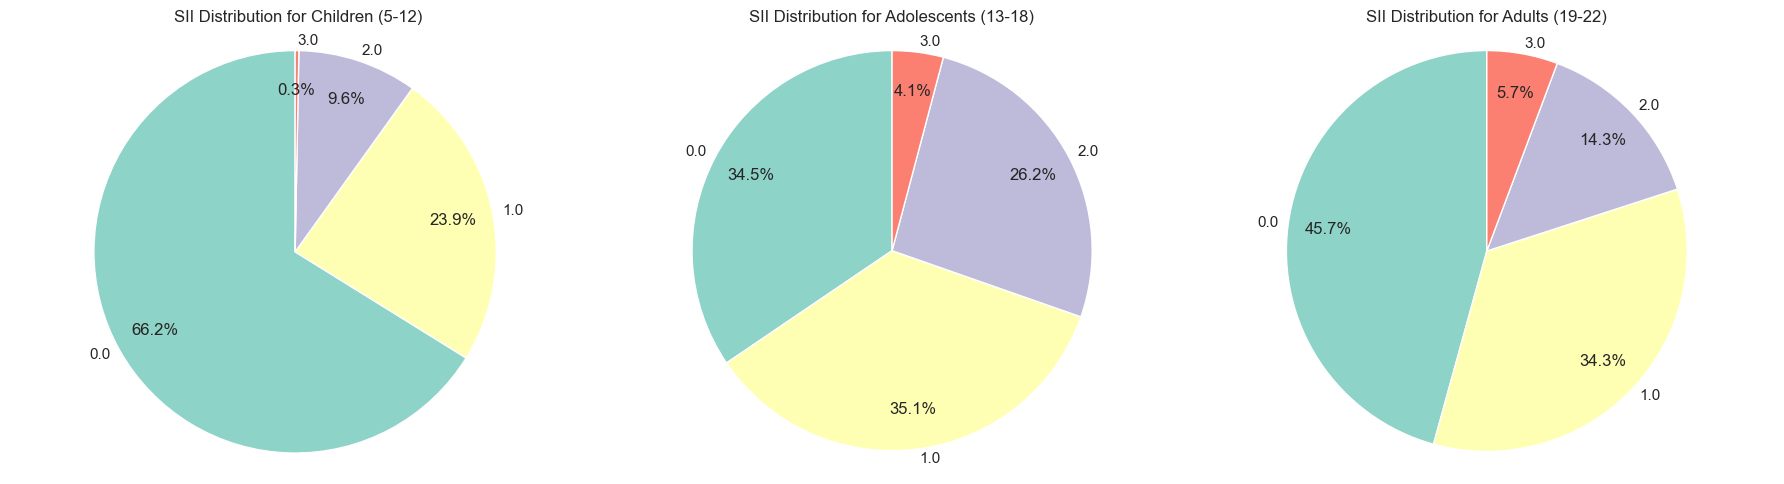

In [27]:
stats = data.groupby(['Age Group', 'sii']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, age_group in enumerate(stats.index):
    group_counts = stats.loc[age_group] / stats.loc[age_group].sum()
    axes[i].pie(
        group_counts, labels=group_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"),
        labeldistance=1.05, pctdistance=0.80
    )
    axes[i].set_title(f'SII Distribution for {age_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

Adult data is less and can be ignored considering the use case

In [29]:
stats = data.groupby(['Age Group', 'sii']).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

sii,0.0,1.0,2.0,3.0
Age Group,,,,
Children (5-12),1343 (66.2%),486 (23.9%),195 (9.6%),6 (0.3%)
Adolescents (13-18),209 (34.5%),213 (35.1%),159 (26.2%),25 (4.1%)
Adults (19-22),16 (45.7%),12 (34.3%),5 (14.3%),2 (5.7%)


They show that higher SII scores are generally associated with older age groups, but there's considerable overlap in the age ranges within each category, and the median PCIAT_Total is higher in adolescents, suggesting a U-shaped relationship between age and PIU impairment (the peak of Internet-related problems may occur during adolescence).

Accordingly, in the pie charts, the distribution of SII for children and adults is skewed towards lower values (none and mild), whereas, for adolescents, the distribution is more balanced across the categories of none, mild and moderate.

But what about the numbers (see tables)? The number of adolescents is much lower than that of children, and the number of adult participants is extremely low (88 in total and only 36 with SII)!

As we have seen from the graphs in the previous section, the overall distribution of SII is skewed towards lower values and severe cases are rare. So there may be relationships that we cannot see with such unequal sample sizes and under-representation of severe cases.


Descriptive Statistics for CGAS Score:
count    2288.000000
mean       65.132430
std        11.821454
min        25.000000
25%        59.000000
50%        65.000000
75%        75.000000
max        95.000000
Name: CGAS-CGAS_Score, dtype: float64

Descriptive Statistics for SII Score:
count    2671.000000
mean        0.572070
std         0.766791
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: sii, dtype: float64


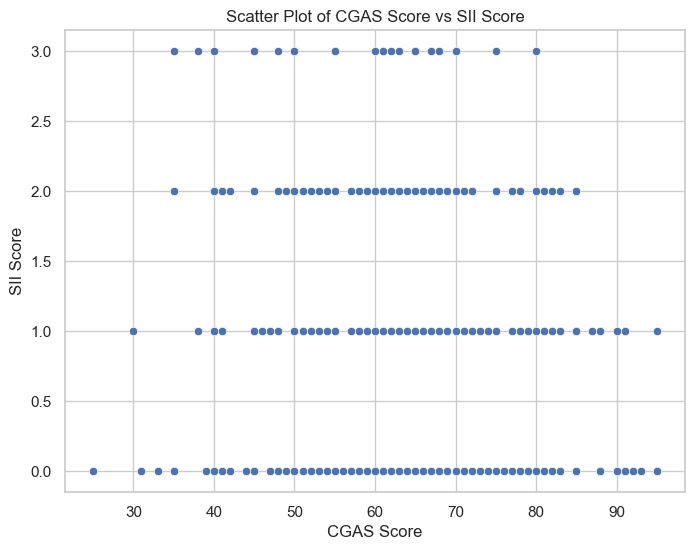

In [8]:
# CGAS Score vs SII
print("Descriptive Statistics for CGAS Score:")
print(data['CGAS-CGAS_Score'].describe())
print("\nDescriptive Statistics for SII Score:")
print(data['sii'].describe())


# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CGAS-CGAS_Score', y='sii', data=data)
plt.title('Scatter Plot of CGAS Score vs SII Score')
plt.xlabel('CGAS Score')
plt.ylabel('SII Score')
plt.show()